In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
trainx = np.array(((0,0),(0,1),(1,0),(1,1)))
trainy = np.array(((0),(1),(1),(1)))

In [41]:
trainx_size = trainx.shape
trainy_size = trainy.shape
print("Trainx size is " +str(trainx_size))
print("Trainy size is " +str(trainy_size))

Trainx size is (4, 2)
Trainy size is (4,)


In [42]:
trainx = np.transpose(trainx)

trainy = trainy.reshape(trainy.shape[0],1)
trainy = np.transpose(trainy)

print("Trainx size is " +str(trainx.shape))
print("Trainy size is " +str(trainy.shape))

Trainx size is (2, 4)
Trainy size is (1, 4)


In [0]:
def makeZeros(dim):

  w = np.zeros((dim,1))
  b = 0

  return w,b

In [0]:
def sigmoid(z):

  g = 1/(1+np.exp(-z))

  return g

In [0]:
def fwdProp(w,b,X,Y,i,loss):

  z = np.dot(w.T,X) + b
  a = sigmoid(z)

  cost = 1/-m*(np.sum(np.multiply(Y,np.log(a)) - np.multiply((1-Y),np.log(1-a))))
  loss.append(cost)
  
  if i%10 == 0:
     print("Cost after iteration "+str(i)+" is: " + str(cost))


  return z,a,loss

In [0]:
def backProp(m,a,X,Y):

  dz = a - Y

  dw = 1/m* np.dot(X,dz.T)
  db = 1/m* np.sum(dz)

  return dw,db

In [0]:
def learn(w,b,dw,db,lr):

  w = w - lr*dw
  b = b - lr*db

  return w,b

In [0]:
def predict(w,b,x):

  z = np.dot(w.T,x) + b
  a = sigmoid(z)

  return a

OR gate output predictor


Enter a learning rate: 0.1
Enter the number of times you want to learn: 100
Learning...


Cost after iteration 0 is: 0.34657359027997264
Cost after iteration 10 is: 0.1594192979594465
Cost after iteration 20 is: 0.05814363462017785
Cost after iteration 30 is: -0.0007211528358017152
Cost after iteration 40 is: -0.036809378048515695
Cost after iteration 50 is: -0.059604259102607
Cost after iteration 60 is: -0.07412038596579124
Cost after iteration 70 is: -0.08323110733925548
Cost after iteration 80 is: -0.08869310523664516
Cost after iteration 90 is: -0.09163636885736905


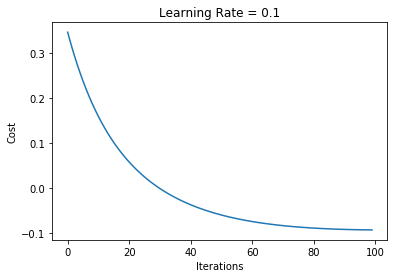

In [56]:
dim = trainx.shape[0]
m = trainx.shape[1]

print("OR gate output predictor\n\n")
lr = float(input("Enter a learning rate: "))
iter = int(input("Enter the number of times you want to learn: "))
print("Learning...\n\n")

w,b = makeZeros(dim)
loss = []

for i in range(0,iter):
  z,a,loss = fwdProp(w,b,trainx,trainy,i,loss)
  dw,db = backProp(m,a,trainx,trainy)
  w,b = learn(w,b,dw,db,lr)

plt.plot(np.squeeze(loss))
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.title("Learning Rate = "+str(lr))
plt.show()

In [57]:
x = int(input("Enter the value of x: "))
y = int(input("Enter the value of y: "))

if (x!=0 and x!=1) or (y!=0 and y!=1):
  print("Invalid")

pred = np.array((x,y))

pred = pred.reshape((pred.shape[0],1))
result = predict(w,b,pred)

if result>=0.5:
  result = 1
else:
  result = 0

print("The OR gate output is " +str(result))

Enter the value of x: 1
Enter the value of y: 0
The OR gate output is 1
